<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/HandsOn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
The dataset provided is from the city of Melbourne and contains the different attributes of the properties there and the locations in which they are located. The aim is to perform a detailed analysis of this dataset and provide useful insights to facilitate the process of buying and selling real estate.

## Data Description:

The detailed data dictionary is given below:

* Suburb - Suburb in which the property is located
* Rooms - Number of rooms in the property
* Type - Type of the property like
    * h - house,cottage,villa, semi,terrace,
    * t - townhouse,
    * u - unit, duplex
* SellerG - Name of the real estate agent who sold the property
* Date - Date on which the property was sold
* Distance - Distance of the property from CBD in kilometres. CBD is the central business district of the city.
* Postcode - Postcode of the area
* Bedroom - Number of bedrooms in the property
* Bathroom - Number of bathrooms in the property
* Car - Number of car parking spaces in the property
* Landsize - Size of the land in square metres
* BuildingArea - Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.)
* YearBuilt - Year in which the building was built
* Regionname - Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.
* Propertycount - Number of properties that are present in the suburb
* Price - price (in AUD) at which the property was sold

### 4.1 Sanity Checks

**Importing necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/Melbourne_Housing.csv')

**View the first and last 5 rows of the dataset**

In [5]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [6]:
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


**Understand the shape of the dataset**

In [7]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 27114 rows and 16 columns.


**Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


* There are 10 numerical columns in the data and 6 object type columns.
* Date column is being read as object type column but it should be in date-time format.
* BuildingArea is read as object type column but it should be a numerical column.

In [9]:
# changing the data type of Date column
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
## the above code did not have format and was giving the below err
##ValueError: time data "13-05-2017" doesn't match format "%m-%d-%Y", at position 32. You might want to try:
## so now after adding the right format it worked and now lets compare the DATE dtype
data.info()##  4   Date           27114 non-null  datetime64[ns] -- > it is now changed to this from  4   Date           27114 non-null  object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [10]:
# let's see why BuildingArea column has object data type
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

* It will be difficult to analyze each data point to find the categorical values in this column. Let's find the count of non-numeric values and see what are these values.

In [11]:
# checking the count of different data types in BuildingArea column
data['BuildingArea'].apply(type).value_counts()

,count
BuildingArea,
<class 'float'>,16571
<class 'str'>,10543


* We can see that there are mixed data type values in the column like - 'missing', 'inf' which should actually be read as missing values (NaN). Let's replace such data points with null values.


In [12]:
# replacing values with nan
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'],np.nan)

# changing the data type to float
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [13]:
# let's check the data type of columns again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

* We see that the data types of Date and BuildingArea columns have been fixed.
* There are 11 numerical columns, 4 object type columns, and 1 date time column in the data.
* We observe that some columns have less entries that other columns (less than 27114 rows) which indicates the presence of missing values in the data.

**We could have also done this replacement of missing and inf to NaN while loading the data. Let's see how -**

In [14]:
# using na_values to tell python which values it should consider as NaN
data_new = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/Melbourne_Housing.csv',na_values=['missing','inf'])

* This method is useful when we know what kind of values to consider as anomalies in the data.

In [15]:
data_new['BuildingArea'].dtype

dtype('float64')

* We observe that now building area is being considered as float after the 'missing' and 'inf' were read as NaN.

**What are missing values?**

Missing values occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

**Checking for missing values in the data**

In [16]:
data.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
SellerG,0
Date,0
Distance,1
Postcode,1
Bedroom,6436
Bathroom,6442
Car,6817


* There are missing values in 8 columns of the data.
* We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.

**Checking for duplicate entries in the data**

In [17]:
data.duplicated().sum()

11

* There are 11 duplicate entries in the data. Let's remove them.

In [18]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True,inplace=True)

**Let's check the statistical summary of the data.**

In [19]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


* `Rooms:` On average there are 3 rooms in a property. 75% of the properties have less than or equal to 4 rooms. There are some properties which have 16 rooms.
* `Distance`: On average the properties are located within 11.28 Kms of central business district, while the median is 10.5 Kms. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* The distribution of the number of bedrooms, bathrooms, and car parking spaces is fine. The maximum values of these columns might require a quick check.
* `Landsize`: The Landsize column has a huge standard deviation with a mean and median land size of 560.53 and 513 metres respectively. Also, there is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* `YearBuilt`: The latest property was built in 2019 while the earliest property was built in 1850.
* `Propertycount`: On average a suburb has around 7564 properties. The column has a large standard deviation of 4494.02 units.
* `Price`: On average the house prices are AUD 1050664. The median prices are AUD 871000. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.

In [20]:
# let's check the total number of unique values in the Postcode column
data['Postcode'].nunique()

209

* There are a total of 209 different postcodes in the data.

**Let's check the count and percentage of categorical levels in each column**

In [21]:
# Making a list of all categorical variables
cat_cols =  ['Suburb', 'Type', 'SellerG', 'Regionname']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

In [22]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64
--------------------------------------------------
Type
h   0.679
u   0.217
t   0.104
Name: proportion, dtype: float64
--------------------------------------------------
SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64
--------------------------------------------------
Regionname
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan

**Observations**
* Highest number (724) of the properties are in Reservoir suburb followed by 493 properties in Bentleigh East suburb.
* Most of the properties (18394 or 67%) are of type 'h' that is houses/cottages/villas, etc followed by 5882 or 21% properties of type 'u' that is unit/duplex. The least number (2827 or 10%) is of type 't' that is townhouses.
* Top 5 sellers of properties are  - Nelson, Jellis, Barry, hockingstuart, and Ray.
* 31% of the properties are in Southern Metropolitan followed by 28% in Northern Metropolitan, and 21% in Western Metropolitan. This shows that our analysis will be biased towards Metropolitan regions than Victoria regions as around 98% of the data points are from Metropolitan region.

### 4.2 Univariate Analysis

**Let's check the distribution for numerical columns.**

**Observations on Distance**

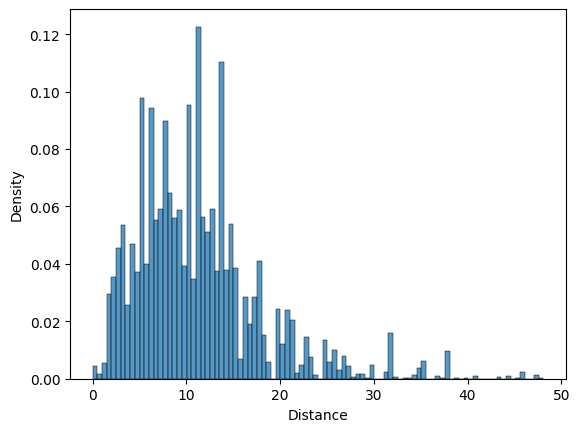

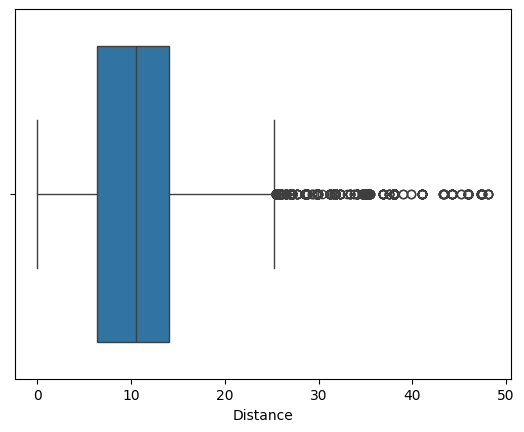

In [23]:
sns.histplot(data=data,x='Distance',stat='density')## Revalidate what is density
plt.show()
sns.boxplot(data=data,x='Distance')
plt.show()

* The distribution is skewed towards right.
* There are many outliers present in this column.
* Values above 25 Kms are being represented as outliers in the boxplot, indicating there there are many properties that are atleast 25 Kms away from CBD.

**Observations on Landsize**

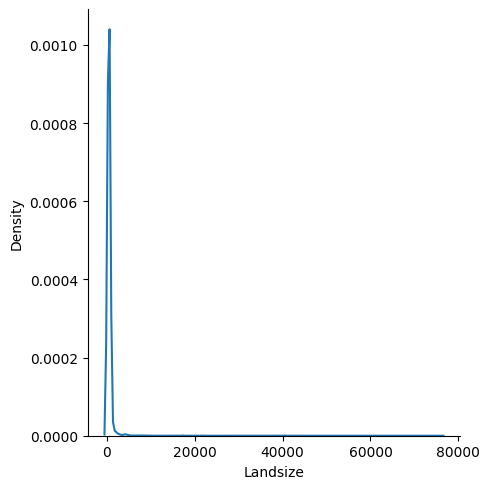

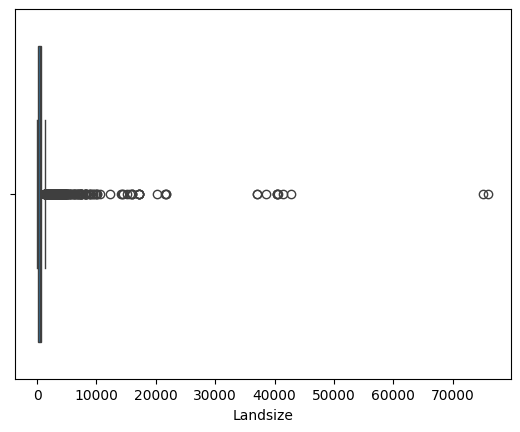

In [24]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()
sns.boxplot(data=data,x='Landsize')
plt.show()

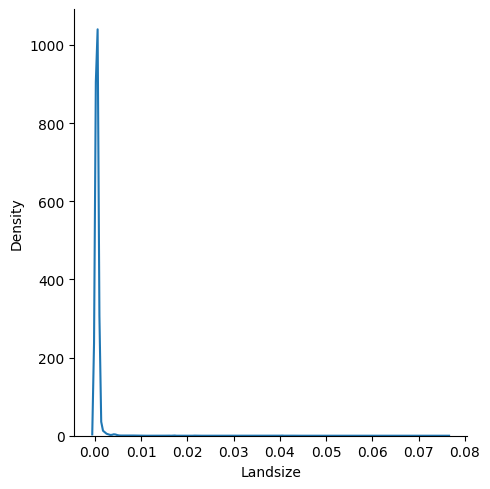

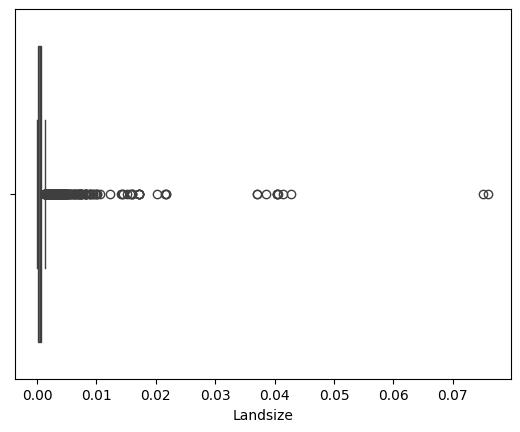

In [25]:
# converting Landsize to sq. kilometres from sq. metres
sns.displot(data=data,x=data['Landsize']/1000000,kind='kde')
plt.show()
sns.boxplot(data=data,x=data['Landsize']/1000000)
plt.show()

* The distribution is skewed towards the right, even after conversion to Kilometres.  
* There are many outliers present in this column. Some properties have a landsize of more than 60000 sq meters. These value seems to be very high and can possibly be a data entry error. We should check it further.

In [26]:
data.loc[data['Landsize']>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.600,3795.000,3.000,2.000,2.000,76000.000,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.200,3104.000,3.000,1.000,2.000,75100.000,NaN,NaN,Southern Metropolitan,7809,2000000


* Just by looking at these observation it is difficult to say whether these are data entry errors or not. Although the land size does look very high.

**Observations on BuildingArea**

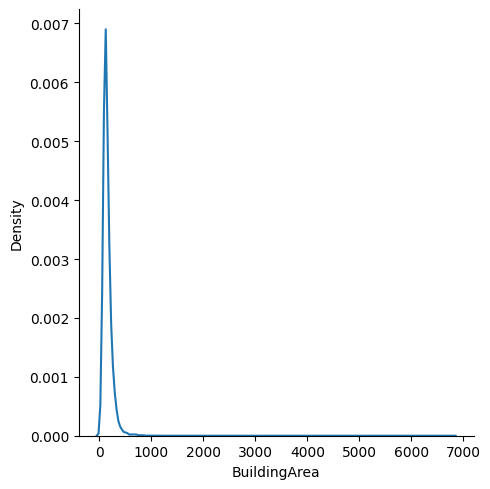

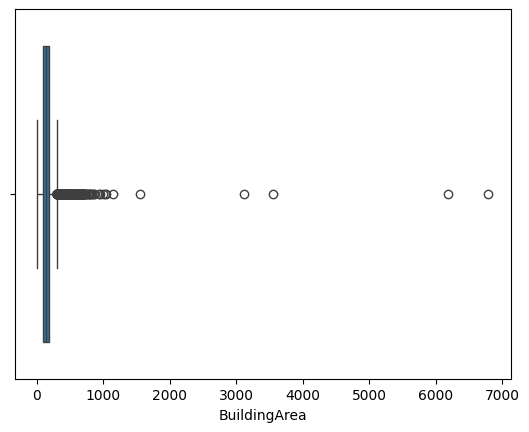

In [27]:
sns.displot(data=data,x='BuildingArea',kind='kde')
plt.show()
sns.boxplot(data=data,x='BuildingArea')
plt.show()

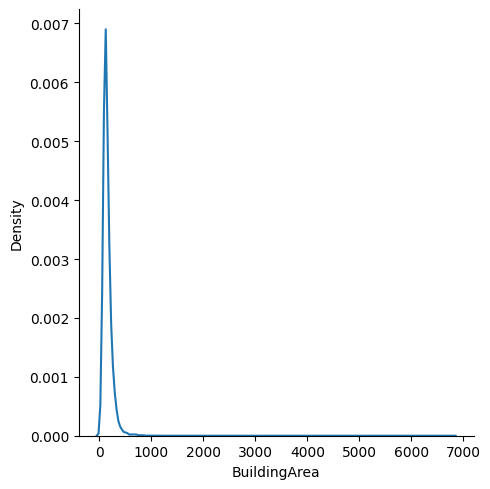

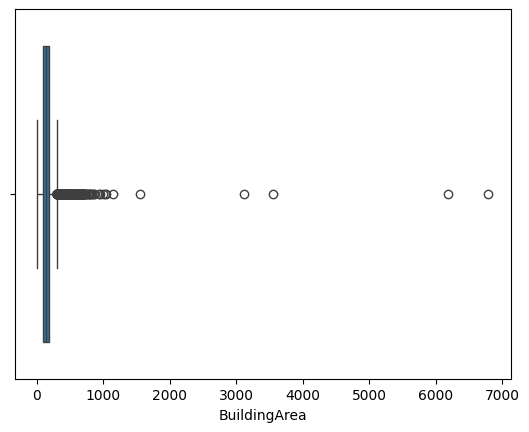

In [28]:

sns.displot(data=data,x=data['BuildingArea'],kind='kde')
plt.show()
sns.boxplot(data=data,x=data['BuildingArea'])
plt.show()

* The distribution of BuildingArea is similar to Landsize that is right skewed.
* It has many outliers. There are values above 4000 sq meters which seems high.

**Observations on Price**

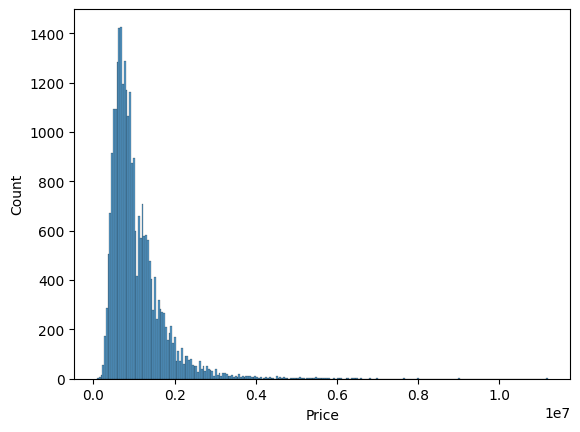

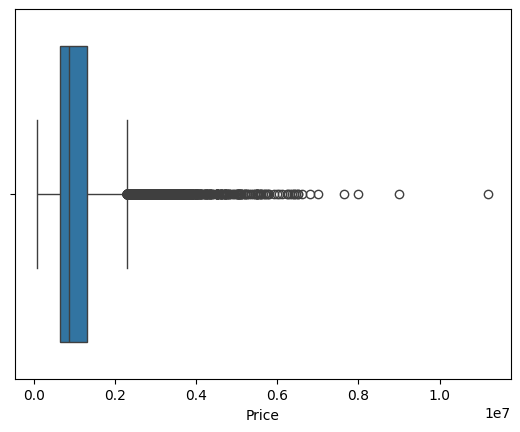

In [29]:
sns.histplot(data=data,x='Price')
plt.show()
sns.boxplot(data=data,x='Price')
plt.show()

* The distribution of the Price is skewed towards the right.
* There are many outliers in this variable and the values above 2000000 are being represented as outliers by the boxplot.
* The values seem fine as the selling price of the properties varies and depends upon various factors. For example, distance, if the properties are closer to CBD they might have a higher selling price.

**Observations on Rooms**


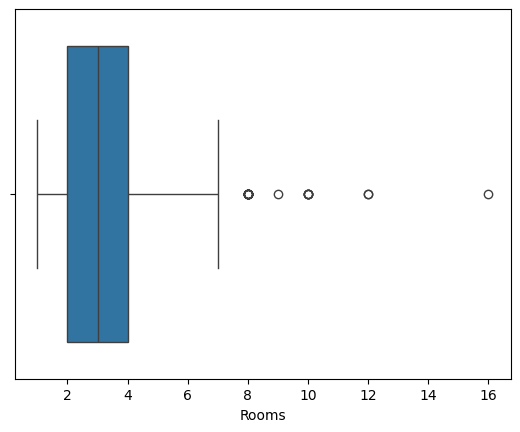

In [30]:
sns.boxplot(data=data,x='Rooms')
plt.show()

* Properties with more than 7 rooms are being represented as outliers by the boxplot.
* Let's find out how many such properties are there which have more than 7 rooms and what are the types of such properties.

In [31]:
data.loc[data['Rooms']>7].shape

(23, 16)

* There are only 23 such properties which have more than 7 rooms.

In [32]:
# findig the type of such properties
data.loc[data['Rooms']>7,'Type'].value_counts()

,count
Type,
h,21
u,2


* There are no townhouses in these.
* Most of these properties are houses/villas,etc
* Only 2 of such properties are units/duplexes.
* This indicates that 'h' type properties are a more likely choice for customers who are looking for bigger properties.

**Observations on Region Name**

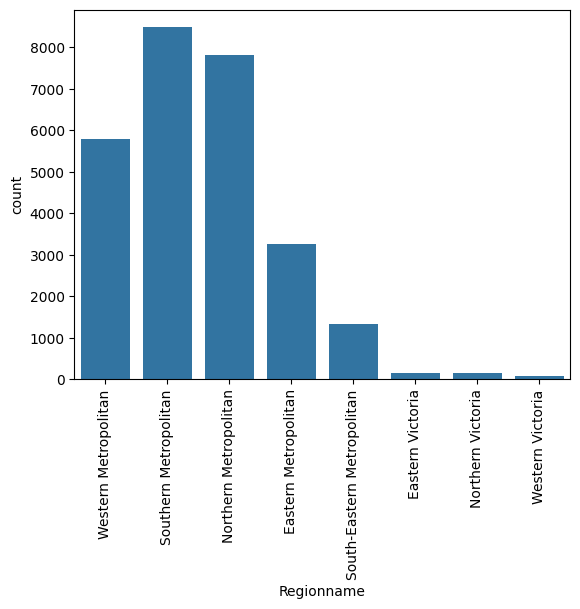

In [33]:
sns.countplot(data=data,x='Regionname')
plt.xticks(rotation=90)
plt.show()

* Eastern, Northern, and Western Victoria have very less number of properties.
* Southern and Northern Metropolitan have the most number of properties.

### 4.3 Bivariate Analysis

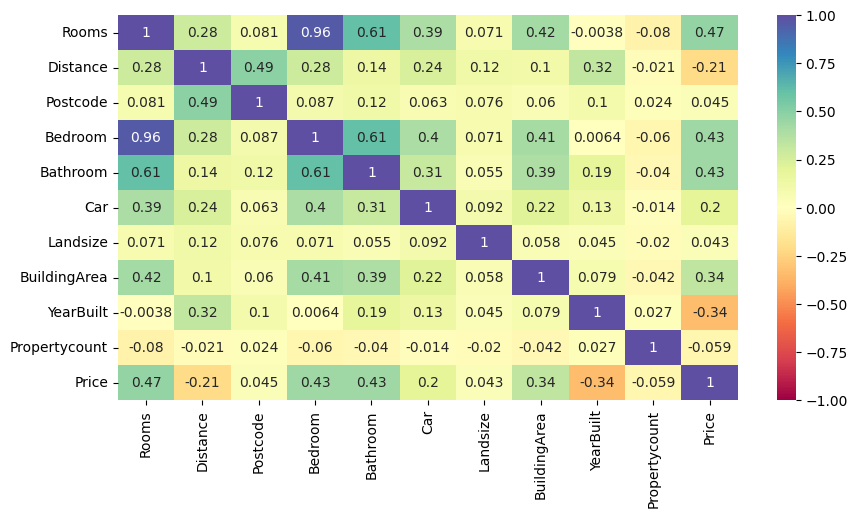

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
## previously this data is not loading bcos we had something like the below
## sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
## the above line was throwing error on the suburb column as this column is a str and
## this code is not able to execute and now its corrected to include only the numberical val
plt.show()

**Observations**
* Price column shows a high correlation with number of rooms, bedrooms, bathrooms and car parking spaces. This indicates that more the number of rooms, bedrooms, etc more will be the selling price of a property.
* Price has a negative correlation with Distance column. This indicates as the distance increases the selling price of a property will decrease.
* Price has a negative correlation with YearBuilt column. This indicates that vintage properties have higher selling price as compared to properties built recently.
* Rooms, Bedrooms, and Bathrooms show a high correlation with each other which is expected.
* BuildingArea and Landsize shows a positive correlation which makes sense as if the land size is more the building area will also be more.
* We should not consider the correlation value with Postcode because this column is a unique identifier for an area, and an increase or decrease in postcode can not impact any other feature.

**Properties which have more space for living or more number of rooms, bedrooms and bathrooms generally tend to have higher selling prices. Let's analyze the relationship between the price and total number of rooms in a property**

In [35]:
# let's create a column with a sum of number of rooms, bedrooms, bathrooms, and car parking spaces
data['Total Space'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data.head()


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000


* The column has been successfully added in the data frame.

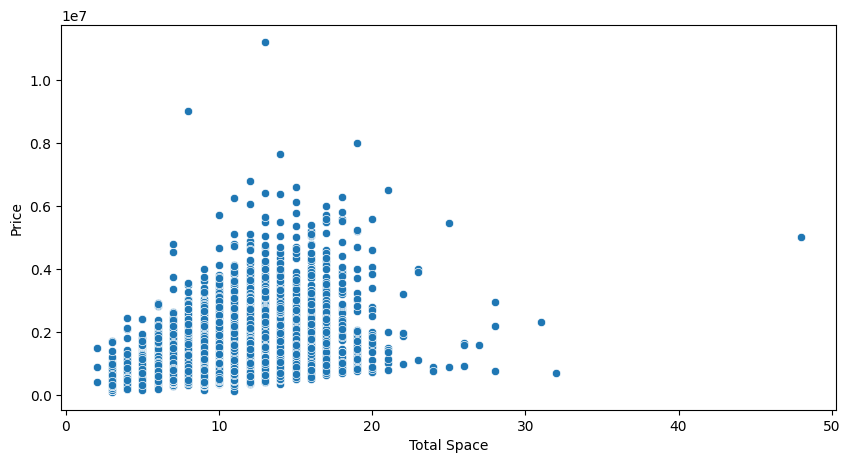

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Total Space',y='Price')
plt.show()

* We can see an increasing trend of selling price with total space. Let's visualize the trend using lmplot().

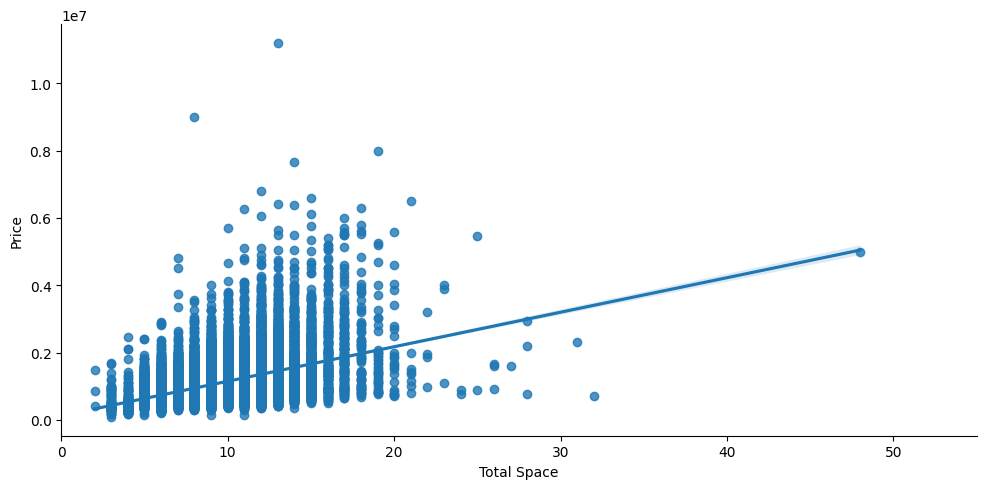

In [37]:
sns.lmplot(data=data,x='Total Space',y='Price',height=5,aspect=2)
plt.xlim(0,55)
plt.show()

* A positive correlation or an increasing trend can be clearly observed between the total number of rooms and the selling price of the property, although the line plotted by lmlot() doesn't show a high correlation. Let's check the correlation value further.
* The positive correlation indicates that more living space implies a higher selling price.

In [38]:
# lets check the correlation between Total space and Price
data[['Total Space','Price']].corr()

,Total Space,Price
Total Space,1.000,0.458
Price,0.458,1.000


* As expected, there is a positive correlation between Total Space and Price but it is not very high.

**The distance of the property from the key facilities play a cruicial role in deciding the selling price of a property. The properties located closer to key facilities tend to be priced higher and vice versa. Let's find out if the same relationship exists in our data**

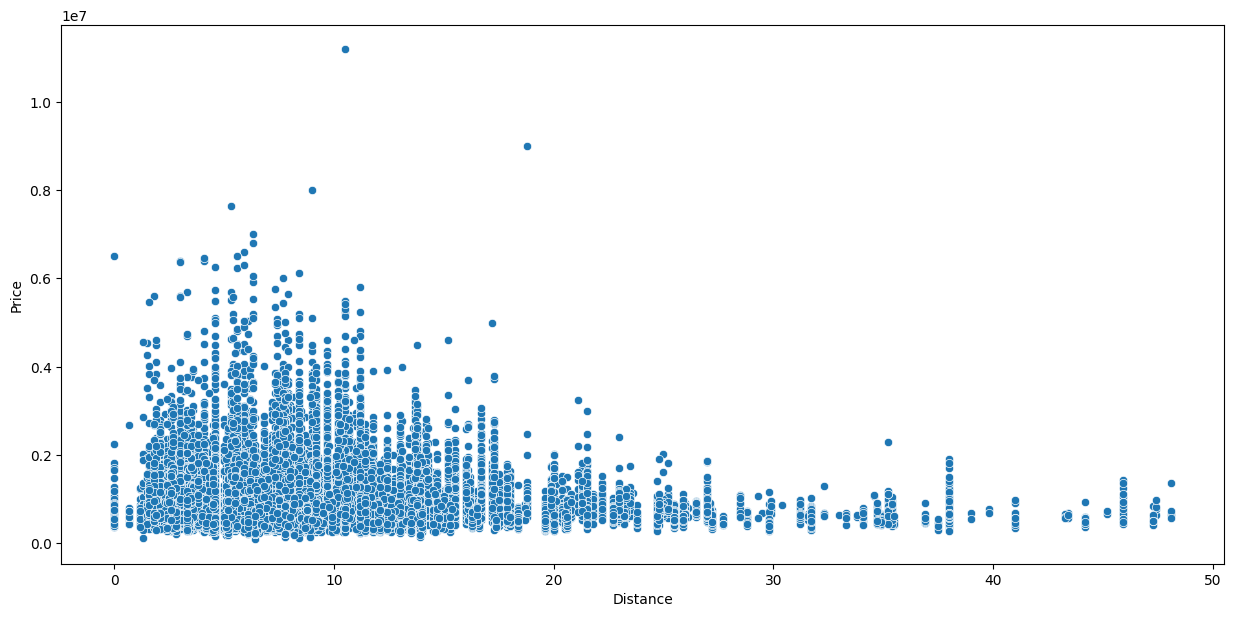

In [39]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y ='Price')
plt.show()

<ipython-input-40-4f120fe1b3cd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Distance', y ='Price',ci=None)


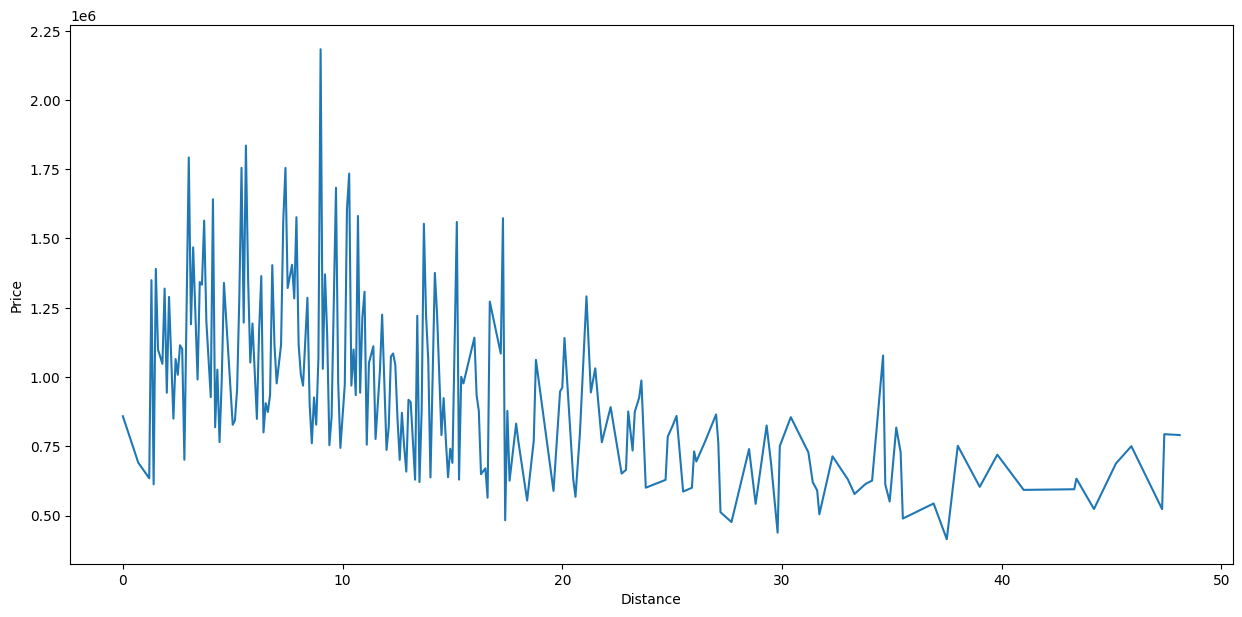

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Distance', y ='Price',ci=None)
plt.show()

* We observe that after 20-25 Kms the selling price of the properties starts decreasing which indicates that distance plays a key role in deciding the selling price of a property.
* Let's create bins/buckets for the Distance column to get better visualization of the relationship between Price and Distance.

**Creating bins for distance column**
* 0 - 15  KMs  - The property will be said to be in **`Nearby`** location.
* 15 - 30 KMs - The property will be said to be in **`Moderately Close`** location.
* 30 - 50 KMs - The property will be said to be in **`Far`** away location.

We will use **pd.cut() function** to create the bins in Distance column.

    Syntax: pd.cut(x, bins, labels=None, right=False)
    
    x - column/array to binned
    bins - number of bins to create or an input of list for the range of bins
    labels - specifies the labels for the bins
    right - If set to False, it excludes the rightmost edge of the interval

In [41]:
# using pd.cut() function to create bins
data['Distance_bins'] = pd.cut(data['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately Close','Far'], right = False)

In [42]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby


**Let's check the price with the distance bins**

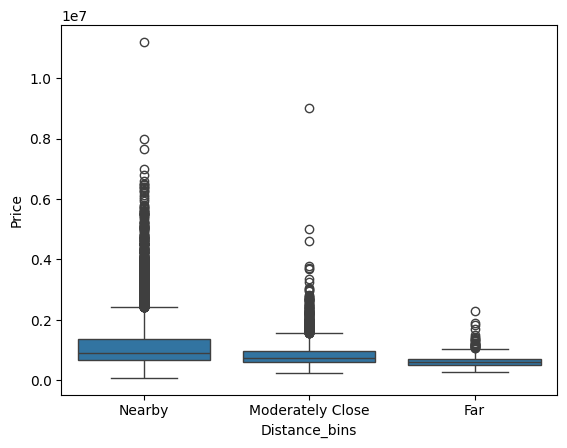

In [43]:
sns.boxplot(data=data,x='Distance_bins',y='Price')
plt.show()

* It is a little difficult to make observations from here with so many outliers present in the data. Let's turn off these outliers (not removing from data) and see if we can observe any noticeable difference.

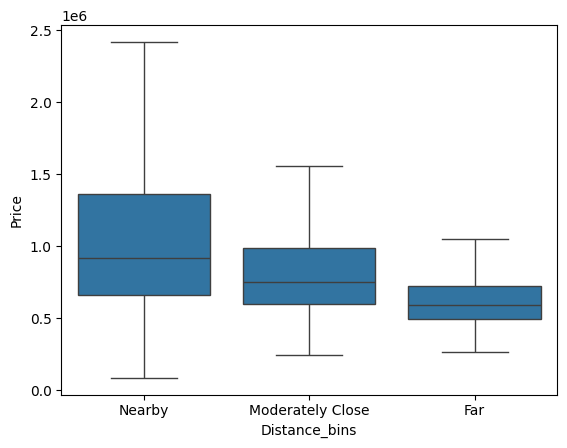

In [44]:
sns.boxplot(data=data,x='Distance_bins',y='Price',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.show()

* We can see that as the distance increases the selling price of the property decreases.
* The properties closer to CBD have a high variance in the selling price. This variance in price decreases with the increase in distance.
* Considering that a customer has planned the budget for buying a property as the 'median' selling price for nearby, moderately close, and far away properties.

  This variation in the selling price of a property might impact the planned budget of the customer who is looking to buy a property near CBD (as the variance is high). The customer might be able to get the property within the planned budget for properties that are far from CBD.


**As we observed in the correlation plot there is a negative correlation between the selling price of a property and the year it was built. Let's analyze it further**

In [45]:
# let's first calculate the age of a property from the year it was built in to see how the prices vary with it
year_at_sale = data['Date'].dt.year
year_at_sale

,Date
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
27098,2017
27099,2017
27100,2017
27101,2017


In [46]:
np.max(year_at_sale)

2018

In [47]:
data['AgeofProp'] = year_at_sale - data['YearBuilt']
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,9.000,Nearby,0.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby,116.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby,86.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby,3.000


* The column was added in the data frame.

In [48]:
data[data['AgeofProp']==-2]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
21326,Brighton East,2,h,Buxton,2016-09-24,10.700,3187.000,4.000,3.000,2.000,302.000,250.000,2018.000,Southern Metropolitan,6938,1310000,11.000,Nearby,-2.000


<ipython-input-49-ab33d0095f5c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data,x='AgeofProp',y='Price',ci=None)


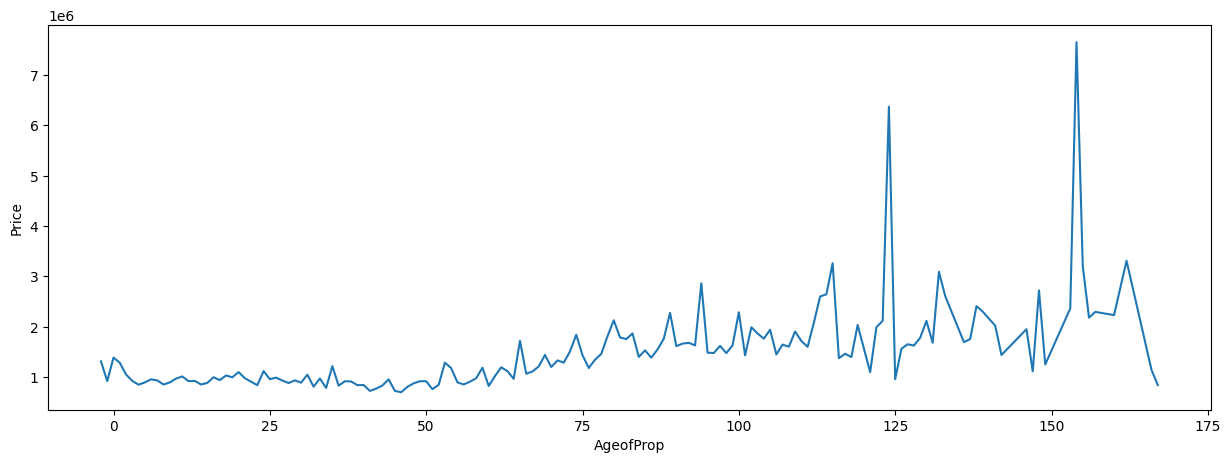

In [49]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='AgeofProp',y='Price',ci=None)
plt.show()

* We observe an increasing trend indicating the properties which are older (vintage properties) have higher selling prices.
* The customers who wish to live in vintage properties might have to spend more money.
* Let's see this trend for all the regions

* sns.relplot() is used to visualize any statistical relationships between quantitative variables.
* Why use relplot() instead of scatterplot() ?
    * relplot() lets you create multiple plots on a single axis.
        - kind - specifies the kind of plot to draw (scatter or line)
        - ci - specifies the confidence interval
        - col_wrap - specifies the number of columns in the grid

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/

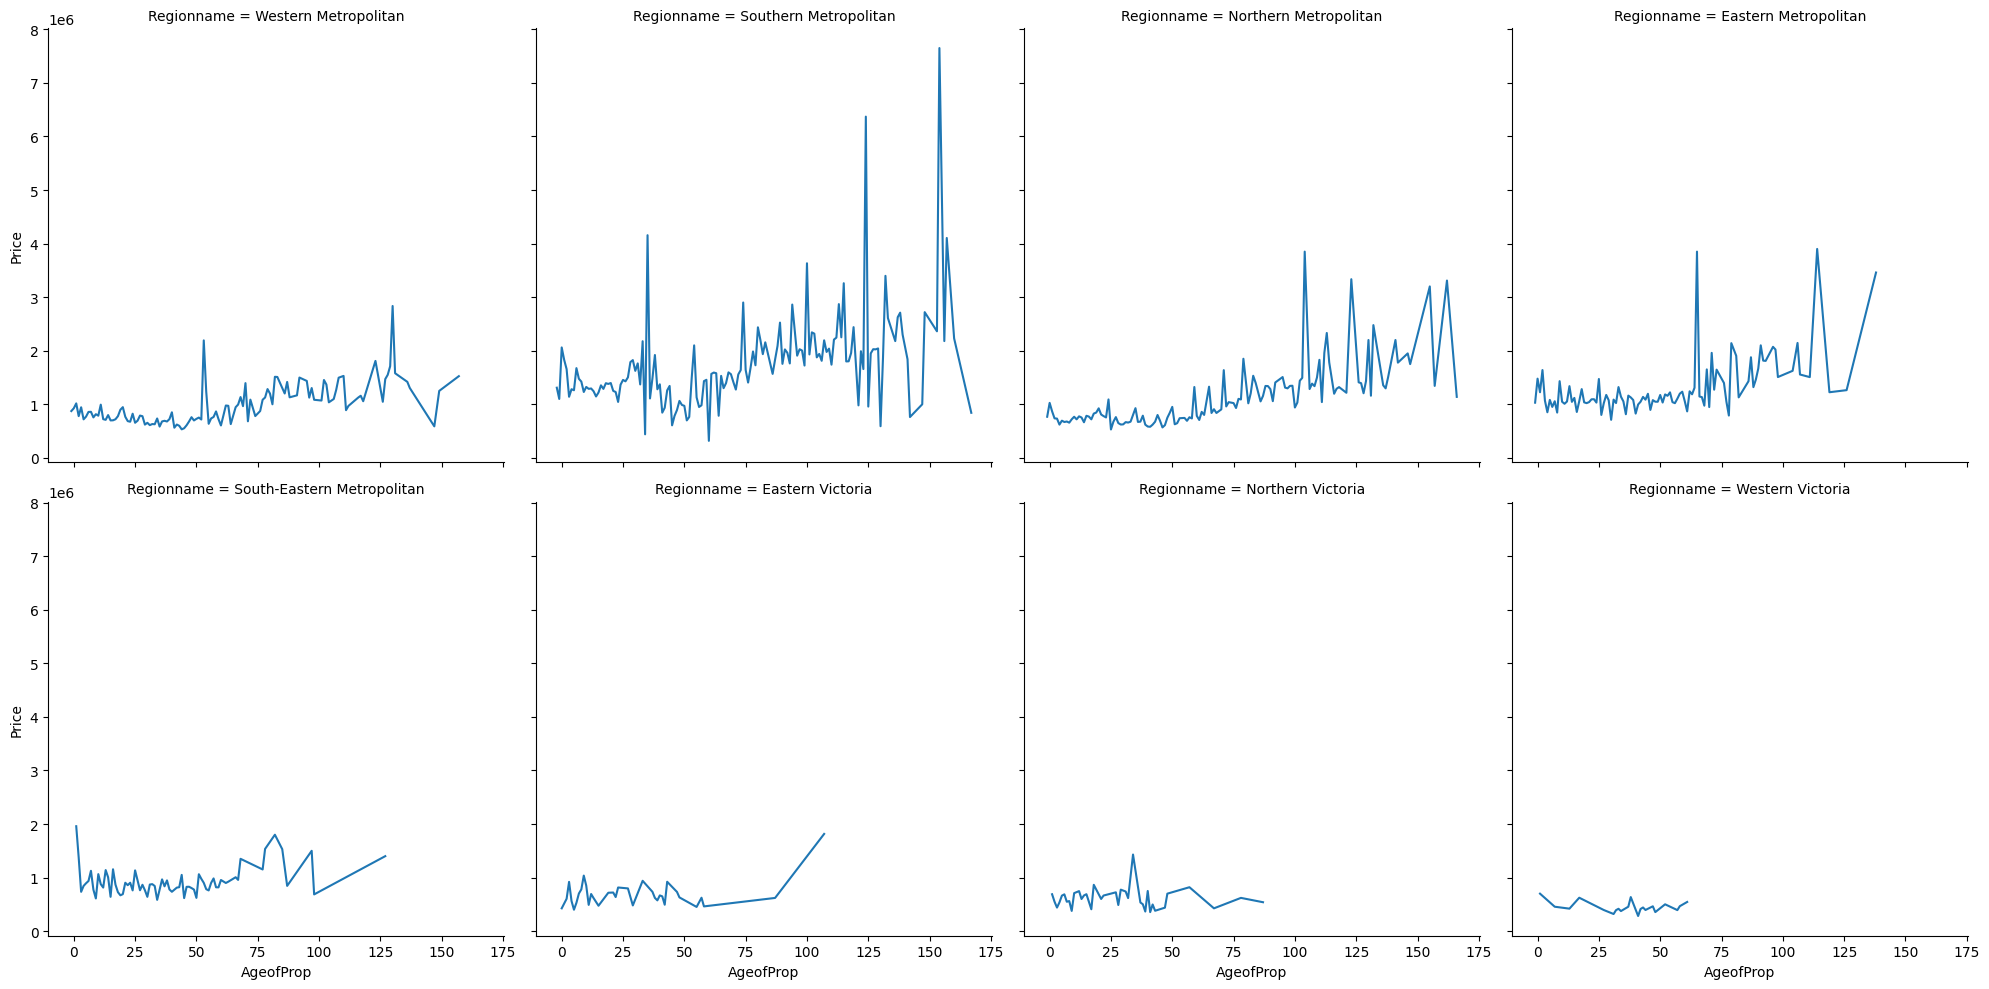

In [50]:
sns.relplot(data=data,x='AgeofProp',y='Price',col='Regionname',kind='line', ci=None, col_wrap=4)
plt.show()
# double click on the plot to zoom in

* The trend of selling price increasing with the increase in age of the property is evident from the plot for Metropolitan regions.
* The trend of Victoria regions is slightly unclear, but this was expected as the number of data points for these regions is very low.

**The price of properties vary based on the type of the property. For example, a villa may be priced higher than a duplex because of more amenities. Let's see which type of property is priced higher.**

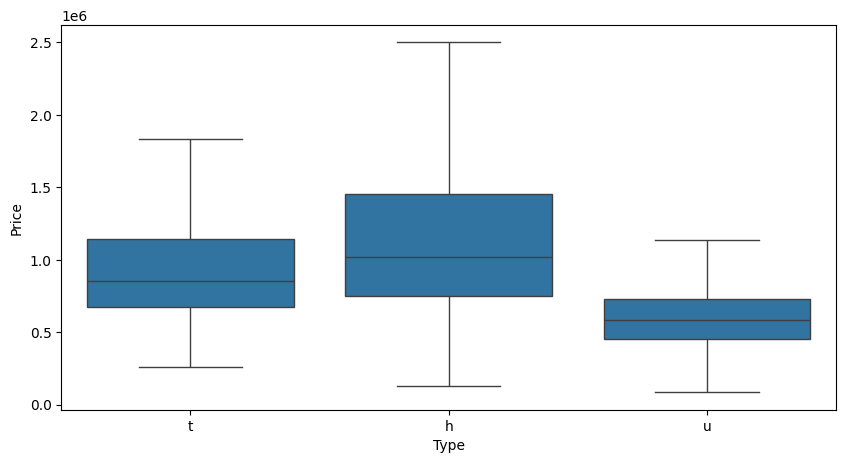

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Type',y='Price',showfliers=False) # turning off outliers
plt.show()

* The properties like villa, cottage, etc have a higher median price as compared to a townhouse and a duplex.
* The townhouses have a higher median price than unit, duplex properties.
* Customers planning to buy 'h' type property might have to invest more.

**Similarly the region of the property will play an integral role in deciding the selling price. Let' do a similar analysis with regions as well**

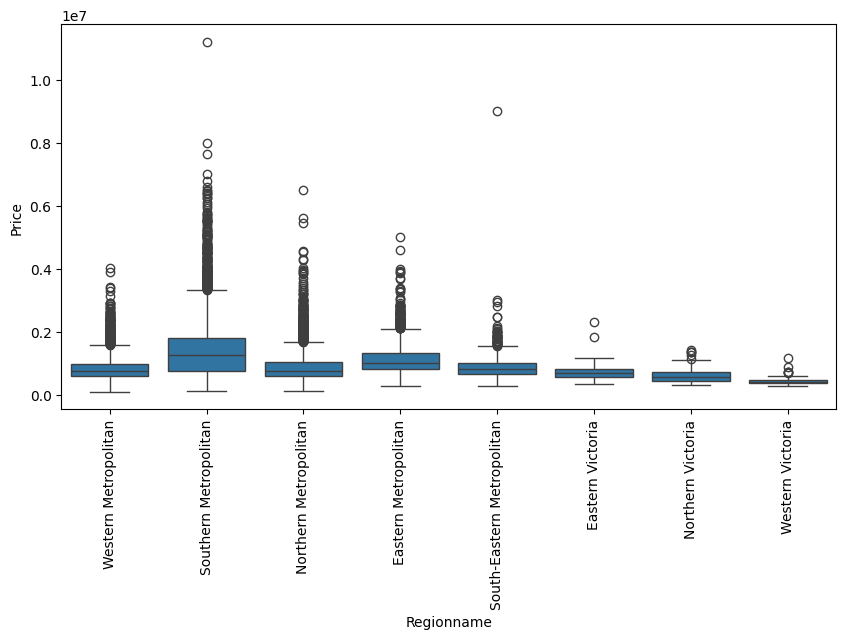

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Regionname',y='Price',showfliers=True) # turning on outliers
plt.xticks(rotation=90)
plt.show()

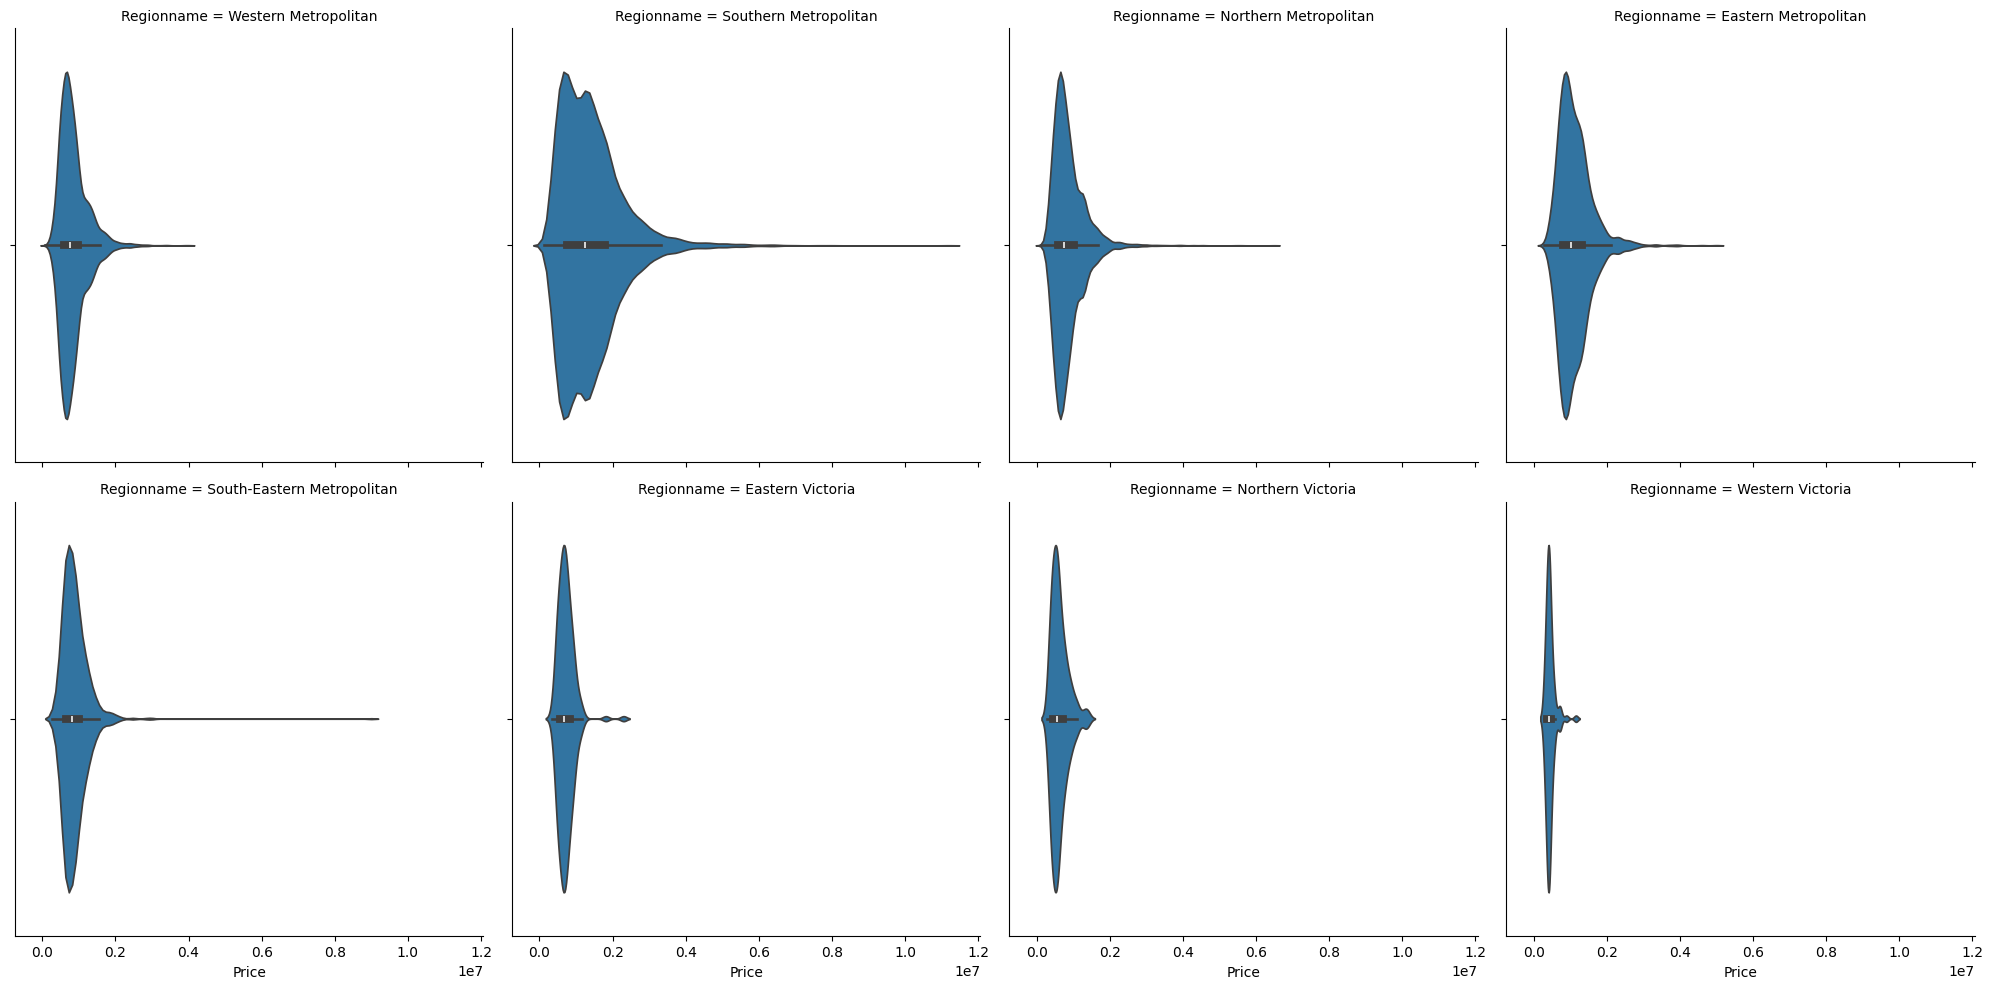

In [53]:
# Dispersion of price in every region
sns.catplot(x='Price',
            col='Regionname',
            data=data,
            col_wrap=4,
            kind="violin")
plt.show()

* In Metropolitan, the southern and eastern regions have the costliest properties while the northern and western properties are priced similarly.

* In Victoria, there is an increasing trend of prices, western having the lowest priced properties while northern has moderately priced properties, and eastern region having high priced properties.

### 4.4 Missing value treatment

* There is no universally accepted method of dealing with missing values.
* It is often left to the discretion of the data scientist to take a decision on missing values that is whether to impute them or drop them.
* However, it is sometimes a good practice to impute the missing values rather than dropping them, because it can lead to loss of information in other features where values are present.

**How to treat missing values?**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

* Other methods include k-NN, MICE, SMOTE, deep learning, ...

**Limitations of imputing missing values with central tendencies**

* When we impute the missing values with central tendencies the original distribution of the feature can get distorted.
* After imputation with the central value the variance and standard deviation of a feature can get drastically impacted.
* The impact of distortion is higher with higher percentage of missing values.

So, before directly imputing the missing values with central values of column we should investigate the missing data closely to observe the pattern of missing values, and then take a decision to impute the missing value with appropriate measure.

**Lets see the count and the percentage of missing values in each column**

In [54]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
##[data.isnull().sum() > 0]:
##This part acts as a filter. It selects only the columns from the Series where the number of missing values (data.isnull().sum()) is greater than 0.
##This means it focuses on the columns with at least one missing value.
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780
Total Space,6806,25.112
Distance_bins,1,0.004


* BuildingArea and YearBuilt columns have the highest percentage of missing values.
* Distance and Postcode have the least number of missing values.
* Bedroom, Bathroom, and Car have almost equal percentage of missing values.
* AgeofProp and Total Space has equal percentage of missing values as YearBuilt and Bedroom, Bathroom, and Car because the information here were extracted using these columns.
* Landsize has around 34% missing values.

**Missing value treatment for Distance column**

In [55]:
# extracting all the information of other variables where Distance is null
data.loc[data['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


* We observe that the data is missing for other attributes as well. This is a common problem with data collection where sometimes the data is not missing randomly and has a pattern in missingness.
* Let's see if we can find more information using the name of the Suburb.

In [56]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


* We see that there is only one data entry for the Fawkner Lot suburb and in this case it is possible that data for this suburb was not collected. This shows that data is not missing randomly rather has pattern in missingness.
* Imputing the Distance as well other information will not be a suitable approach as the imputed values will not be reliable. Hence, we will drop this row.

In [57]:
# adding the index value of the row in data.drop() function
data = data.drop(9590).reset_index(drop=True)

In [58]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.703
Bathroom,6430,23.725
Car,6805,25.109
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Total Space,6805,25.109
AgeofProp,15117,55.778


In [59]:
# extracting all the information of other variable where Bedroom is null
data.loc[data['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins,AgeofProp
8,Altona North,4,h,hockingstuart,2016-09-03,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-09-03,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-09-03,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Moderately Close,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Moderately Close,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


* It looks like wherever Bedroom is null the data points in other columns are also missing. Let's check this.

In [60]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

,count
Bathroom,
NaN,6424


In [61]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

,count
Car,
NaN,6424


In [62]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

,count
Landsize,
NaN,6418
594.000,1
446.000,1
338.000,1
250.000,1
549.000,1
239.000,1


In [63]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

,count
BuildingArea,
NaN,6424


In [64]:
data.loc[data['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

,count
YearBuilt,
NaN,6424


* There seems to be a strong pattern in missing values, as wherever the Bedroom column has missing data the other columns like Bathroom, Car, Landsize, BuildingArea, and YearBuilt also have missing values.
* Let's see if the missing data has some pattern in suburbs, and regions of properties.

In [65]:
data.loc[data['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

,count
Suburb,
Reservoir,236
Bentleigh East,144
St Kilda,116
Glenroy,116
Richmond,111
...,...
Cranbourne East,1
Melton West,1
New Gisborne,1


In [66]:
# to find the total number of unique values in a suburb
data['Suburb'].nunique()

344

* Across 344 suburbs the missing values are present in 307 suburbs, indicating that the most suburbs have missing values.
* There seems to be no pattern of missing values with respect to suburb column.

In [67]:
data.loc[data['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)

,count
Regionname,
Southern Metropolitan,2197
Northern Metropolitan,1912
Western Metropolitan,1212
Eastern Metropolitan,728
South-Eastern Metropolitan,317
Eastern Victoria,26
Northern Victoria,25
Western Victoria,7


* Similar to suburbs there seems to be no notable pattern across different regions.

**Missing value treatment for Bedroom, Bathroom, and Car columns**

* One of the approaches to treat the missing values of these columns would be to group the data on the basis of Region and Type of the property to get a better idea of the average number of bedrooms, bathrooms, and car parking spaces.
* It is more likely that a property of certain type in a given region would have similar number of bedrooms, bathrooms, and car parking spaces.

In [68]:
# checking the average number of bedrooms, bathrooms, and car parking spaces in a region
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

* We have received the mean number of Bedrooms, Bathrooms, and Car parking spaces for each type of property in a specific region.

We will use fillna() function and transform method of pandas to impute the missing values.

**fillna() Function -** The fillna() function is used to fill NaN values using the provide input value.

       Syntax of fillna():  data['column'].fillna(value = x)

-----

**transform function -** The transform() function works on each value of  a DataFrame and allows to execute a specified function on each value.

    Sytanx of transform function: data.transform(func = function name)

    * func - A function to be executed on the values of the DataFrame.


In [69]:
# imputing missing values in Bedroom column
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [70]:
# imputing missing values in Bathroom column
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [71]:
# imputing missing values in Car column
data['Car'] = data['Car'].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [72]:
# checking if all the missing values were imputed in Bedroom, Bathroom, and Car columns
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778
Total Space,6805,25.109
AgeofProp,15117,55.778


* We see that the missing values have been imputed.
* Let's convert all the values of Bedroom, Bathroom, and Car to integer type as these columns have discrete values.

In [73]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

**Missing values of Total Space column**

We can create this feature again from the combination of Rooms, Bedroom, Bathroom, and Car as the missing values have now been imputed.

In [74]:
# removing Total Space column
data.drop('Total Space',axis=1,inplace=True)

# creating new Total Space column
data['Total_Space_New'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

**Note:**

It is a good idea to check the distributions of the column again after missing value imputation

**Let's check the relationship of Total Space column with Price once again**
* Here is the old image with total_space & price
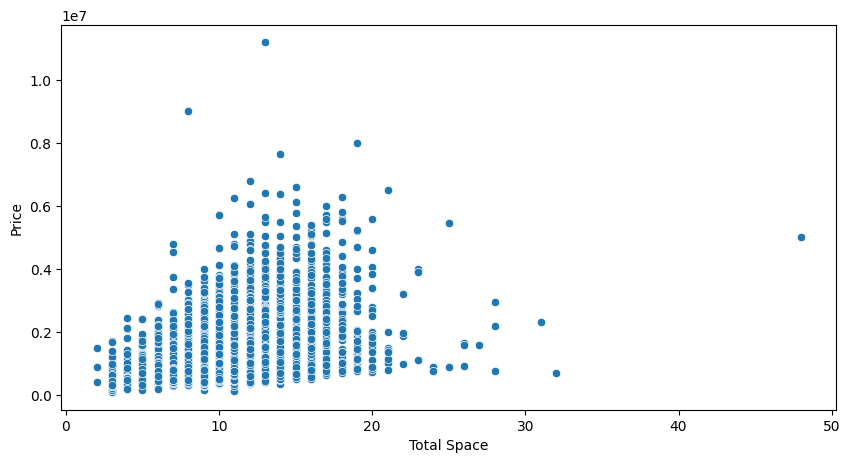

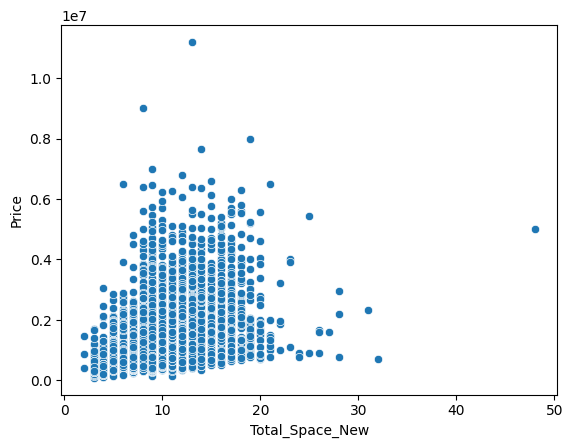

In [75]:
sns.scatterplot(data=data,x='Total_Space_New',y='Price')
plt.show()
## Compare with above image - it didnt have much of a change

* We observe that the relationship between Total Space and Price has not changed and the positive relation between these variables is still maintained, which is a good thing.

**Missing value Treatment for Landsize**

* We will use similar approach we took for imputing missing values in Bedroom, Bathroom, and Car columns. Using region and type of property will be a good way to find the size of land.
* Let's plot the distribution of Landsize.

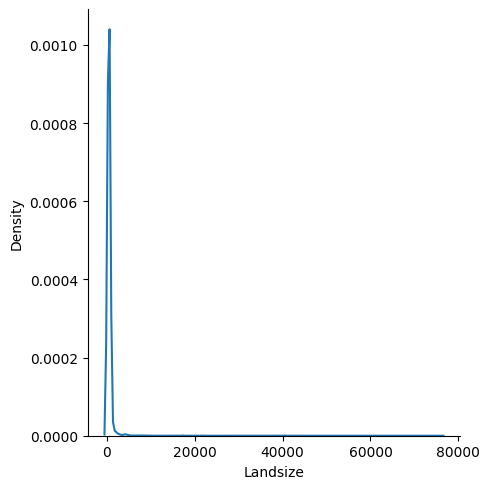

In [76]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()

* As Landsize column is skewed, using average value for imputation might not be the correct method as mean gets impacted by outliers. So we will use median value to impute the missing values of this column as median is not affected by the outliers.

In [77]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

* We have received the median value of Landsize for each type of property in a specific region.

In [78]:
# grouping data on region and type of property
# finding the median of landsize for each group and imputing the missing data with it
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [79]:
# checking if all the missing values were imputed in Landsize column
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150
YearBuilt,15117,55.778
AgeofProp,15117,55.778


**Missing value treatment for BuildingArea, YearBuilt, and AgeofProp**

* We will not do any imputation for Building Area and Year Built as these columns have more than 50% of missing data. As AgeofProp was extracted from YearBuilt column we can not do imputations in it as well.
* Any imputation in these columns will result in creation of new data points which will not be reliable to extract insights from.
* We have two options here -
    * Option 1 - We can use the data which is not null to proceed with the analysis which will allow us to preserve the data which is not missing
    * Option 2- We can drop these columns from the data but it will lead to loss of data points from the data frame.
    

In [80]:
# Taking option 1 to remove the 61% null values from the building area column
new_data = data[data['BuildingArea'].notnull()]
new_data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,Nearby,0.000,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,Nearby,116.000,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,Nearby,86.000,13
5,Altona,3,h,Greg,2016-09-03,13.800,3018.000,3,2,1,352.000,242.000,2015.000,Western Metropolitan,5301,520000,Nearby,1.000,9
6,Altona North,5,h,FN,2016-09-03,11.100,3025.000,5,3,6,592.000,251.000,1965.000,Western Metropolitan,5132,1085000,Nearby,51.000,19


* We observe that the index of data frame has changed and the rows which had missing values in BuildingArea column have been removed.
* Similarly the above steps can be repeated for YearBuilt and AgeofProp column.

In [81]:
# Option 2 -  dropping columns BuildingArea, YearBuilt, and AgeofProp from the data frame
data = data.drop(['BuildingArea','YearBuilt','AgeofProp'],axis=1)
## Three types of data missing 1. Missing completely at Random 2. Missing at Randome 3. Missing Not at Random (MNAR)

In [82]:
# saving the dataset with all the missing values treated
data.to_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/Melbourne_Housing_NoMissing.csv',index=False)

### 4.5 Outlier Detection and Treatment

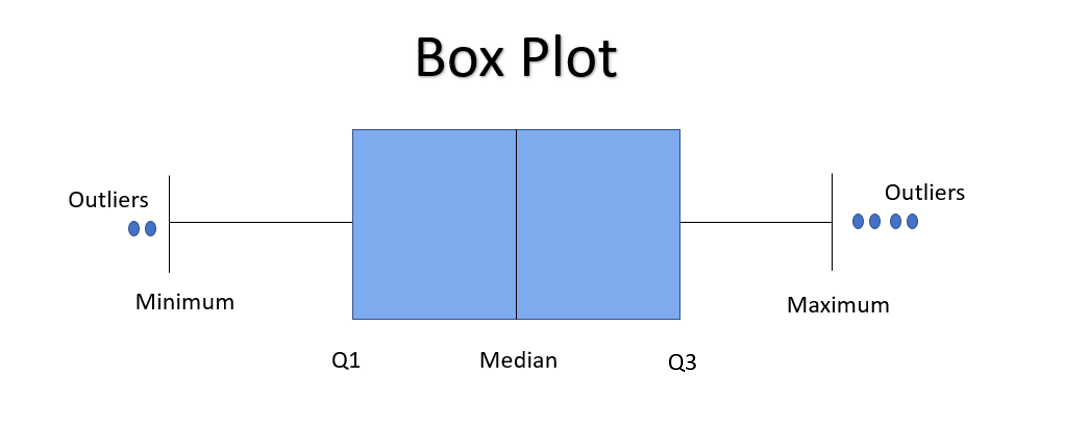

In [83]:
from IPython.display import Image
Image("/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/boxplot.png")

* An outlier is a data point that are abnormally/unrealistically distant from other points in the data.

* The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting data points.

* It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Domain Knowledge and impact of the business problem tend to drive this decision.

**Handling outliers**

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

So, it is often a good idea to examine the results by  running an analysis with and without outliers.

In [84]:
# reading the dataset
data = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/Melbourne_Housing_NoMissing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bins,Total_Space_New
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,Nearby,9
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,Nearby,5
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,Nearby,5
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,Nearby,13
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,Nearby,10


**Let's visualize all the outliers present in data together**

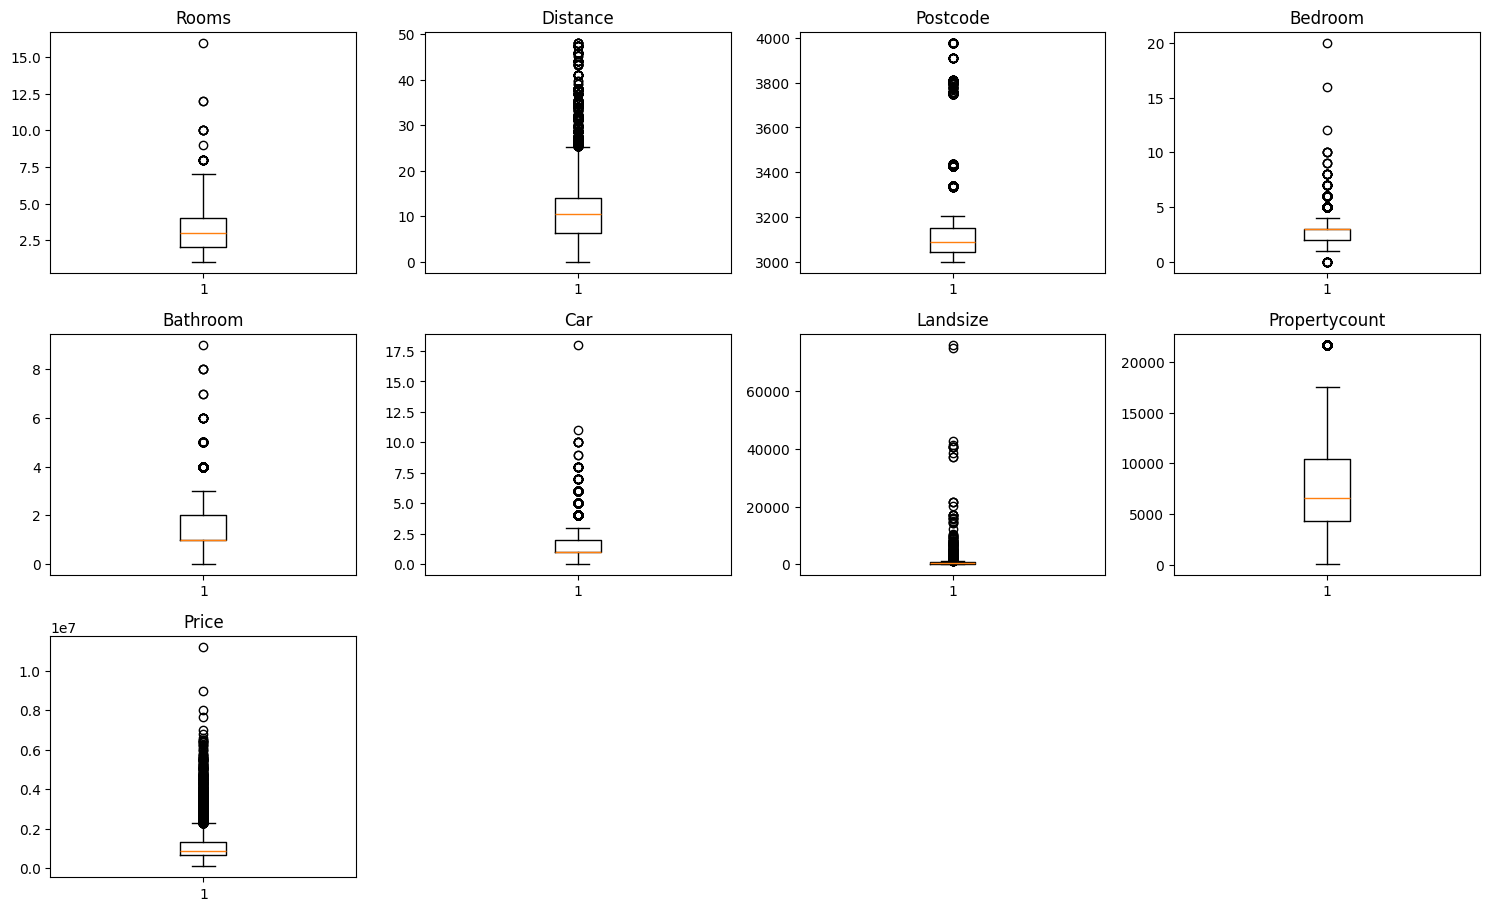

In [85]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car','Landsize',
                   'Propertycount', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Resampling technique - bootstrapping & cross-validation can be used to assess stability of outlier detection method and evaluate their perf in diff sampling methods

We can see that all the numerical features in the data set have outliers present in them.


**Let's analyze each column to see if the values in them can be considered as outliers or not.**
  
  
 * Rooms, Bedroom, Bathroom, Car - The values which are being represented as outliers in the above boxplot may not seem realistic in some cases. For example- It is not common to have more than 15 rooms, 15 bedrooms, and more than 10 car parking spaces in a general scenario.

Although these values can not be considered to be unrealistic but we will rarely see such high number of rooms, bedrooms, bathrooms and car parking in a property. So, we will treat the outliers in this column.
  
  
 * Distance - The outliers in this column can be considered as genuine values because a property can be at varying distances from the C.B.D. In the context of this problem we will not consider these values as outliers.


 * Postcode - Postcodes are a combination of several numerical values based on region, sub-region, etc and these cannot be considered as outliers.



 * Landsize - The values in this column seem unrealistic as some of the properties have a Land size greater than 0.1 Sq Kms. So, we will treat the outliers in this column.



 * Propertycount- Each suburb can have varying number of properties depending upon the region and the area of a suburb. Hence, the count of properties in a suburb can be considered as genuine values and not outliers.



 * Price - The selling price of properties depends upon various factors (for example location of a property) and the prices can change from time to time. Hence, the selling price of properties can be considered as genuine values and not outliers.

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [86]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [96]:
## Just trying to find the what happens when i execute this code which is replicate of what is down below
outliers_cnt = ((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [87]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

,0
Rooms,0.085
Distance,4.343
Postcode,2.911
Bedroom,4.195
Bathroom,0.871
Car,4.306
Landsize,1.742
Propertycount,2.671
Price,4.660


**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

**Creating a function to floor and cap/clip outliers in a column**

In [97]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

**Treating outliers in Rooms column**

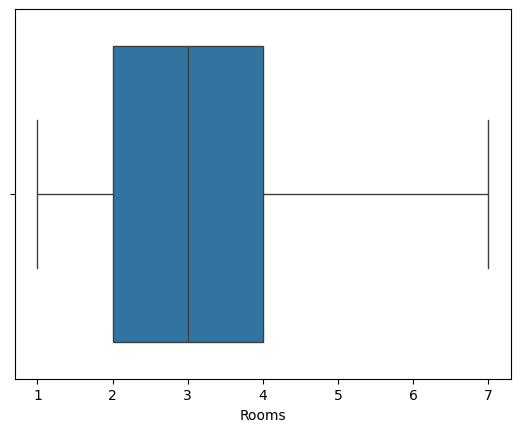

In [89]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

* The maximum number of rooms in a property have been capped to 7. All the values greater than 7 (whisker value) have been treated.

**Similarly we will treat the outliers in other columns using the same approach**

In [90]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

**Let's visualize numerical columns where outliers were treated**

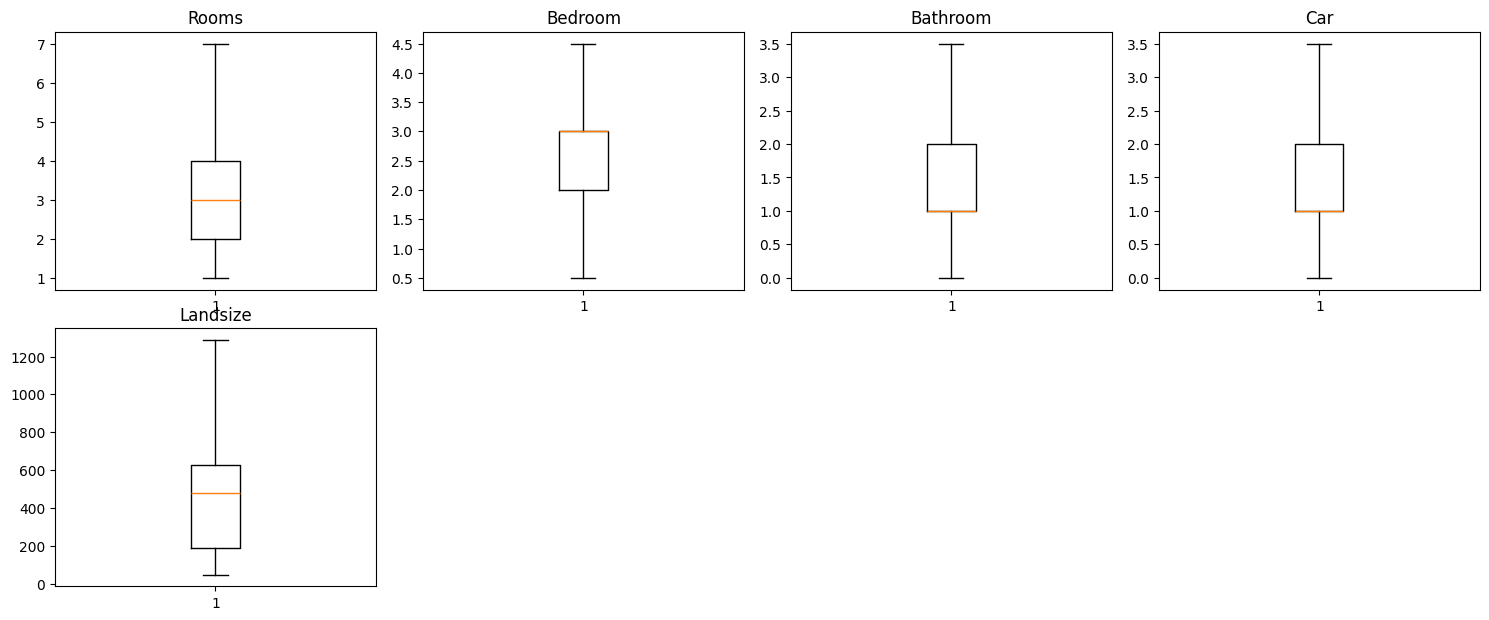

In [91]:
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car','Landsize']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the outliers have been treated.
* We observe that the data type of Bedroom, Bathroom, and Car has changed to float which we should change to the integer type.
* We can also see that the distribution of Landsize column doesn't look heavily right-skewed now.

**Setting the data type to integer for Bedroom, Bathroom, and Car columns**

In [92]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [94]:
# saving the dataset with all the outlier values treated
data.to_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Python_Foundation_Week3/Melbourne_Housing_NoOutliers.csv',index=False)